In [1]:
from urllib.request import urlretrieve
import pandas as pd

url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
urlretrieve(url, 'winequality-red.csv')
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

#### If you just wanted to load a file from the web into a DataFrame without saving it locally...

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

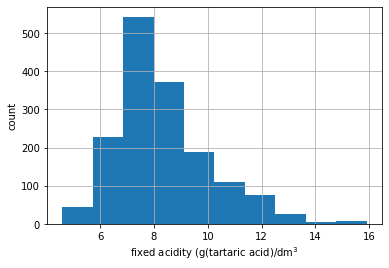

In [4]:
import matplotlib.pyplot as plt
df = pd.read_csv(url, sep=';')
print(df.head())

#plot the first column of df
df.iloc[:,0].hist()
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$')
plt.ylabel('count')
plt.show()

### Importing Excel file

In [5]:
url = 'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'
xls = pd.read_excel(url, sheet_name=None) #sheet_name=None -> import all sheets
print(xls.keys())
print(xls['1700'].head())

odict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


## Codebyte practice - factorial

In [23]:
#brute force - recursion

def factorial(num):
    if (num==1 or num==0):
        return 1
    return num*factorial(num-1)

def test():
    print(factorial(5))
    print(factorial(10))
    print(factorial(15))
    
test()

120
3628800
1307674368000


In [33]:
#use memorization
from typing import Dict

memo:Dict[int, int] = {0:1, 1:1}
def factorial(num:int)->int:
    if num not in memo:
        memo[num] = num*factorial(num-1)
    return memo[num]
    
test()

120
3628800
1307674368000


In [34]:
#automatic memorization
from functools import lru_cache

@lru_cache(maxsize=None)
def factorial(num:int) -> int:
    if num==1 or num==0:
        return 1
    return num*factorial(num-1)

test()

120
3628800
1307674368000


In [32]:
#iterative (optimal)
def factorial(num):
    if num==1 or num==0:
        return 1
    res=1
    for i in range(1,num+1):
        res *= i
        print("[{}]: {}".format(i, res))
    return res

factorial(10)

[1]: 1
[2]: 2
[3]: 6
[4]: 24
[5]: 120
[6]: 720
[7]: 5040
[8]: 40320
[9]: 362880
[10]: 3628800


3628800

## Codebyte practice - First Reverse

In [37]:
#simplest solution
def FirstReverse(strParam):
    return strParam[::-1]

def test():
    print(FirstReverse("Hello World!"))
    print(FirstReverse("I love you"))
    
test()

!dlroW olleH
uoy evol I


In [38]:
#my solution
def FirstReverse(strParam):
    strlen = len(strParam)
    res=""
    for i,v in enumerate(strParam):
        res += strParam[strlen-i-1]
    return res
test()

!dlroW olleH
uoy evol I


In [40]:
#my solution2
def FirstReverse(strParam):
    strlen = len(strParam)
    res=""
    for i in range(strlen):
        res+=strParam[strlen-1-i]
    return res
print(FirstReverse("Hello"))

o
ol
oll
olle
olleH
olleH


In [48]:
string1="Winter is coming"
print(string1[::-1])

gnimoc si retniW


## Roman to int

In [51]:
def roman_to_int(input):
    if not isinstance(input, type("")):
        raise TypeError("expected string, got {}".format(type(input)))
    res = 0 #to be returned
    romans = {'M':1000, 'D':500, 'C':100, 'L':50, 'X':10, 'V':5, 'I':1}
    for i in range(len(input)):
        try:
            value=romans[input[i]]
            if i+1<len(input) and romans[input[i+1]]>value:
                res -= value
            else:
                res += value
        except TypeError:
            raise ValueError("invalid roman ")
    return res

print(roman_to_int("MDCXII"))

1612


In [52]:
def int_to_roman(input):
    if not isinstance(input, type(1)):
        raise TypeError("expected in, got {}".format(type(input)))
    if not 1<input<4000:
        raise ValueError("Argument must be between 1 and 3999")
    ints = (1000, 900, 500, 400, 100, 90, 50, 40, 10, 9, 5, 4, 1)
    romans = ('M', 'CM', 'D', 'CD', 'C', 'XC', 'L', 'XL', 'X', 'IX', 'V','IV','I')
    res = []
    for i in range(len(ints)):
        count = int(input/ints[i])
        res.append(romans[i]*count)
        input -= ints[i]*count
    return ''.join(res)

print(int_to_roman(2002))
print(int_to_roman(1998))

MMII
MCMXCVIII


In [54]:
string = "abcdefghijklmnopqrstuvwxyz"
print('abc' in string)

True


In [63]:
string = "coderbyte"
print(sorted(string))
def AlphabetSoup(input):
    return ''.join(sorted(input))
AlphabetSoup("coderbyte")

['b', 'c', 'd', 'e', 'e', 'o', 'r', 't', 'y']


'bcdeeorty'

In [64]:
def ABCheck(input):
    input = input.lower()
    for i in range(len(input)-4):
        if input[i]=='a' and input[i+4]=='b':
            return "true"
        if input[i]=='b' and input[i+4]=='a':
            return "true"
    return "false"

print(ABCheck("after it"))
print(ABCheck("after it"))


'false'

In [70]:
def VowelCount(input):
    res = [i for i in input if i in "aeiou"]
    print(res)
    return len(res)
    
print(VowelCount("Hello world!"))
print(VowelCount("enchantee!"))


['e', 'o', 'o']
3
['e', 'a', 'e', 'e']
4


In [73]:
def ExOh(input):
    input = input.lower()
    return input.count('x') == input.count('o')

ExOh("xxxoooxxxooo")
ExOh("XOXOX")

False

In [75]:
def Palindrome(input):
    input = input.replace(' ', '')
    return input == input[::-1]
    
print(Palindrome("racecar"))

True


In [76]:
def ArithGeo(input):
    d = input[1] - input[0]
    r = input[1]/input[0]
    if all(input[n+1]-input[n]==d for n in range(len(input)-1)):
        return 'Arthmetic'
    elif all(input[n+1]/input[n]==r for n in range(len(input)-1)):
        return 'Geometric'
    else:
        return -1
print(ArithGeo([5,10,15]))
print(ArithGeo([2,4,16,24]))


Arthmetic
-1


In [79]:
test = [2,3,4,1,9,6,13]
print(max(test))
tet = test.remove(max(test))
print(max(test))

13
9


In [85]:
import itertools
def ArrayAddition(arr):
    max_value = max(arr)
    arr.remove(max_value)
    temp = []
    res = []
    for i in range(len(arr)+1):
        for se in itertools.combinations(arr, i):
            temp.append(se)
    for i in temp:
        if sum(i)==max_value:
            return True
    return False
print(ArrayAddition([1,2,3,4,5,6]))

True


In [90]:
from string import Template
my_string = Template('I paid for the Python course only $$$price!')
my_string.substitute(price="12.50")

'I paid for the Python course only $12.50!, amazing!'

In [99]:
def Change(input):
    if not (isinstance(input, type(1.0)) or isinstance(input, type(1))):
        raise TypeError('expected int, got {}'.format(type(input)))
    list_ints = (20, 10, 5, 1, 0.5, 0.2, 0.1)
    list_strings = ("twenty", "ten", "five", "one", "coin1", "coin2", "coint3")
    res = []
    for i in range(len(list_ints)):
        count = int(input/list_ints[i])
        if count:
            res.append(list_strings[i]+" "+str(count))
            input -= list_ints[i]*count
    return '  '.join(res)

print(Change(45))
print(Change(127))
print(Change(256))
print(Change(15.3))
            

twenty 2  five 1
twenty 6  five 1  one 2
twenty 12  ten 1  five 1  one 1
ten 1  five 1  coin2 1  coint3 1


In [101]:
import re
pattern = re.compile(r'\W+')
def LongestWord(input):
    res = pattern.split(input)
    print(res)
    
print(LongestWord("hello world!!! how are you doing"))



['hello', 'world', 'how', 'are', 'you', 'doing']
None


In [104]:
string1="4506 people attend the show"
string2="Yesterday, I saw 3 shows"

print(re.search(r"\d{4}", string1))
print(re.match(r"\d{4}", string1))
print(re.search(r"\d+", string2))
print(re.match(r"\d+", string2))

<re.Match object; span=(0, 4), match='4506'>
<re.Match object; span=(0, 4), match='4506'>
<re.Match object; span=(17, 18), match='3'>
None


In [110]:
import re
string_ex = 'fun!@ time!@$'
res_list = re.split(r'\W+', string_ex)
print(res_list)

['fun', 'time', '']


In [116]:
import empiricaldist

dir(empiricaldist)


['Cdf',
 'Distribution',
 'Hazard',
 'Pmf',
 'Surv',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'empiricaldist',
 'interp1d',
 'np',
 'pd',
 'plt',
 'underride']